# DATA422: Data Wrangling Project (Julia Part) - Blake List
The following code s used to read in, wrangle and visualize the suicide rates per 100,000 population for males and females by country. This data is used to create a stacked bar plot featuring the suicide rates for males and females for European Union countries during the year 2016.

In [114]:
# Update packages.
Pkg.update()

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [81]:
# Import necessary libraries for loading, manipulating and visualizing the data.
using DataFrames
using DataFramesMeta
using CSV
using Query
using VegaLite
using CategoricalArrays

In [82]:
# Read in the suicide estimate data and convert it to a dataframe.
suicide_estimates = CSV.read("suicide_estimates.csv", rows_for_type_detect=1000) |> DataFrame

,Country,Sex,2016,2015,2010,2005,2000
1,Afghanistan,Both sexes,4.7,4.8,5.1,6.3,5.7
2,Afghanistan,Male,7.6,7.8,8.6,10.8,10.0
3,Afghanistan,Female,1.5,1.5,1.4,1.5,1.0
4,Albania,Both sexes,6.3,6.0,7.8,6.7,5.5
5,Albania,Male,7.9,7.6,9.5,7.7,7.4
6,Albania,Female,4.7,4.4,6.1,5.7,3.5
7,Algeria,Both sexes,3.2,3.2,3.3,3.8,4.1
8,Algeria,Male,4.7,4.8,4.9,5.3,5.6
9,Algeria,Female,1.7,1.7,1.8,2.2,2.5
10,Angola,Both sexes,4.7,5.0,5.7,7.2,7.9


In [83]:
# Read in the world happiness report data and convert it to a dataframe.
world_happiness = CSV.read("world_happiness.csv"; header=true, rows_for_type_detect=1000) |> DataFrame

,country,year,Life Ladder,Log_GDP_per_capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,Afghanistan,2008,3.72359,7.197129726,0.450662315,47.55043793,0.718114316,0.183061942,0.88168633,0.517637193,0.25819549
2,Afghanistan,2009,4.40178,7.362664223,0.55230844,47.85967255,0.678896368,0.204633221,0.850035429,0.583925605,0.23709242
3,Afghanistan,2010,4.75838,7.416260242,0.539075196,48.15951157,0.60012722,0.138528779,0.706766069,0.61826545,0.275323808
4,Afghanistan,2011,3.83172,7.445761204,0.521103561,48.45116043,0.495901406,0.176107883,0.731108546,0.611387312,0.267174691
5,Afghanistan,2012,3.78294,7.549240589,0.520636737,48.7383461,0.530935049,0.247712821,0.775619805,0.710384727,0.267919123
6,Afghanistan,2013,3.5721,7.536998749,0.48355186,49.02308655,0.577955365,0.075185701,0.8232041,0.620584846,0.273328096
7,Afghanistan,2014,3.1309,7.519703865,0.525568426,49.30581284,0.508514047,0.118933707,0.871241987,0.531691492,0.374860734
8,Afghanistan,2015,3.98285,7.506759167,0.528597236,49.58853912,0.388927579,0.094635032,0.880638301,0.553553164,0.339276046
9,Afghanistan,2016,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
10,Albania,2007,4.63425,8.984321594,0.821371615,67.16985321,0.528604746,-0.007585163,0.874699533,0.552677572,0.24633503


In [84]:
# Summarise the suicide estimates data to see the types of columns and missing values.
suicide_estimates |>
  describe

,variable,mean,min,median,max,nunique,nmissing,eltype
1,Country,,,,,183,0,CategoricalArrays.CategoricalString{UInt32}
2,Sex,,,,,3,0,CategoricalArrays.CategoricalString{UInt32}
3,2016,9.30984,0.0,7.2,58.1,,0,Float64
4,2015,9.42186,0.0,7.3,61.7,,0,Float64
5,2010,9.89654,0.0,7.3,71.7,,0,Float64
6,2005,10.4102,0.0,7.6,92.5,,0,Float64
7,2000,10.9077,0.1,7.7,93.5,,0,Float64


In [85]:
# Summarise the world happiness report data to see the types of columns and missing values.
world_happiness |>
  describe

,variable,mean,min,median,max,nunique,nmissing,eltype
1,country,,,,,164,0,CategoricalArrays.CategoricalString{UInt32}
2,year,2011.3,2005,2011.0,2016,,0,Int64
3,Life Ladder,5.42857,2.68755,5.31744,8.01893,,0,Float64
4,Log_GDP_per_capita,,10.00054455,,NA,1386,0,String
5,Social support,,0.29018417,,NA,1409,0,String
6,Healthy life expectancy at birth,,36.16766739,,NA,1367,0,String
7,Freedom to make life choices,,0.257533818,,NA,1387,0,String
8,Generosity,,-0.000425956,,NA,1329,0,String
9,Perceptions of corruption,,0.035197988,,NA,1337,0,String
10,Positive affect,,0.362497687,,NA,1404,0,String


In [86]:
# Rename the columns in the world happiness dataframe for easier merging and referencing.
rename!(world_happiness, f => t for (f, t) = zip([:country, :Log_GDP_per_capita], [:Country, :GDP]))

,Country,year,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,Afghanistan,2008,3.72359,7.197129726,0.450662315,47.55043793,0.718114316,0.183061942,0.88168633,0.517637193,0.25819549
2,Afghanistan,2009,4.40178,7.362664223,0.55230844,47.85967255,0.678896368,0.204633221,0.850035429,0.583925605,0.23709242
3,Afghanistan,2010,4.75838,7.416260242,0.539075196,48.15951157,0.60012722,0.138528779,0.706766069,0.61826545,0.275323808
4,Afghanistan,2011,3.83172,7.445761204,0.521103561,48.45116043,0.495901406,0.176107883,0.731108546,0.611387312,0.267174691
5,Afghanistan,2012,3.78294,7.549240589,0.520636737,48.7383461,0.530935049,0.247712821,0.775619805,0.710384727,0.267919123
6,Afghanistan,2013,3.5721,7.536998749,0.48355186,49.02308655,0.577955365,0.075185701,0.8232041,0.620584846,0.273328096
7,Afghanistan,2014,3.1309,7.519703865,0.525568426,49.30581284,0.508514047,0.118933707,0.871241987,0.531691492,0.374860734
8,Afghanistan,2015,3.98285,7.506759167,0.528597236,49.58853912,0.388927579,0.094635032,0.880638301,0.553553164,0.339276046
9,Afghanistan,2016,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
10,Albania,2007,4.63425,8.984321594,0.821371615,67.16985321,0.528604746,-0.007585163,0.874699533,0.552677572,0.24633503


In [87]:
# Convert the suicide estimates dataframe to a long format by combining the year columns into one single year.
suicide_long = melt(suicide_estimates, [:Country, :Sex], names(suicide_estimates)[3:end] , variable_name=:year, value_name=:value)

,year,value,Country,Sex
1,2016,4.7,Afghanistan,Both sexes
2,2016,7.6,Afghanistan,Male
3,2016,1.5,Afghanistan,Female
4,2016,6.3,Albania,Both sexes
5,2016,7.9,Albania,Male
6,2016,4.7,Albania,Female
7,2016,3.2,Algeria,Both sexes
8,2016,4.7,Algeria,Male
9,2016,1.7,Algeria,Female
10,2016,4.7,Angola,Both sexes


In [88]:
# Convert the year column in the suicide data to a string so it can be merged.
suicide_long[:year] = string.(suicide_long[:year]) ;

In [89]:
# Convert the year column in the world happiness data to a string so it can be merged.
world_happiness[:year] = string.(world_happiness[:year]) ;

In [90]:
# Combine the intersecting values long suicide rate and the world happiness report dataframes on both country and year
suicide_happiness = join(suicide_long, world_happiness, on = [:Country, :year], makeunique = true, kind = :inner)

,year,value,Country,Sex,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,2016,4.7,Afghanistan,Both sexes,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
2,2016,7.6,Afghanistan,Male,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
3,2016,1.5,Afghanistan,Female,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
4,2016,6.3,Albania,Both sexes,4.5111,9.282299995,0.638411462,68.69837952,0.72981894,-0.017927289,0.901070774,0.675243735,0.321705997
5,2016,7.9,Albania,Male,4.5111,9.282299995,0.638411462,68.69837952,0.72981894,-0.017927289,0.901070774,0.675243735,0.321705997
6,2016,4.7,Albania,Female,4.5111,9.282299995,0.638411462,68.69837952,0.72981894,-0.017927289,0.901070774,0.675243735,0.321705997
7,2016,3.2,Algeria,Both sexes,5.38817,9.549138069,0.748149693,64.82994843,NA,NA,NA,0.668838143,0.371372014
8,2016,4.7,Algeria,Male,5.38817,9.549138069,0.748149693,64.82994843,NA,NA,NA,0.668838143,0.371372014
9,2016,1.7,Algeria,Female,5.38817,9.549138069,0.748149693,64.82994843,NA,NA,NA,0.668838143,0.371372014
10,2016,9.2,Argentina,Both sexes,6.42722,NA,0.882819116,67.44399261,0.847702205,NA,0.850924492,0.841906726,0.311646461


In [91]:
# Define a list of the names of all European Union countries.
EuropeanUnion = ["Austria","Belgium","Bulgaria","Croatia","Cyprus",
                   "Czech Rep.","Denmark","Estonia","Finland","France",
                   "Germany","Greece","Hungary","Ireland","Italy","Latvia",
                   "Lithuania","Luxembourg","Malta","Netherlands","Poland",
                   "Portugal","Romania","Slovakia","Slovenia","Spain",
    "Sweden","United Kingdom"] ;

In [92]:
# Filter the dataframe by the year 2016. 
df = @where(suicide_happiness, :year .== "2016")

,year,value,Country,Sex,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,2016,4.7,Afghanistan,Both sexes,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
2,2016,7.6,Afghanistan,Male,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
3,2016,1.5,Afghanistan,Female,4.22017,7.49728775,0.559071779,49.87126541,0.522566199,0.057393152,0.793245554,0.564952672,0.348332286
4,2016,6.3,Albania,Both sexes,4.5111,9.282299995,0.638411462,68.69837952,0.72981894,-0.017927289,0.901070774,0.675243735,0.321705997
5,2016,7.9,Albania,Male,4.5111,9.282299995,0.638411462,68.69837952,0.72981894,-0.017927289,0.901070774,0.675243735,0.321705997
6,2016,4.7,Albania,Female,4.5111,9.282299995,0.638411462,68.69837952,0.72981894,-0.017927289,0.901070774,0.675243735,0.321705997
7,2016,3.2,Algeria,Both sexes,5.38817,9.549138069,0.748149693,64.82994843,NA,NA,NA,0.668838143,0.371372014
8,2016,4.7,Algeria,Male,5.38817,9.549138069,0.748149693,64.82994843,NA,NA,NA,0.668838143,0.371372014
9,2016,1.7,Algeria,Female,5.38817,9.549138069,0.748149693,64.82994843,NA,NA,NA,0.668838143,0.371372014
10,2016,9.2,Argentina,Both sexes,6.42722,NA,0.882819116,67.44399261,0.847702205,NA,0.850924492,0.841906726,0.311646461


In [93]:
# Filter the dataframe where the country is contained in the list of European Union countries.
df = @where(df, map(x -> x ∈ EuropeanUnion, :Country))

,year,value,Country,Sex,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,2016,15.6,Austria,Both sexes,7.04807,10.69459534,0.926318586,71.64565277,0.888513982,0.071537279,0.52364099,0.755902588,0.197423846
2,2016,23.9,Austria,Male,7.04807,10.69459534,0.926318586,71.64565277,0.888513982,0.071537279,0.52364099,0.755902588,0.197423846
3,2016,7.7,Austria,Female,7.04807,10.69459534,0.926318586,71.64565277,0.888513982,0.071537279,0.52364099,0.755902588,0.197423846
4,2016,20.7,Belgium,Both sexes,6.94894,10.63217831,0.928964078,71.52167511,0.865759015,-0.064254232,0.4966591,0.764590085,0.259653389
5,2016,27.8,Belgium,Male,6.94894,10.63217831,0.928964078,71.52167511,0.865759015,-0.064254232,0.4966591,0.764590085,0.259653389
6,2016,13.8,Belgium,Female,6.94894,10.63217831,0.928964078,71.52167511,0.865759015,-0.064254232,0.4966591,0.764590085,0.259653389
7,2016,11.5,Bulgaria,Both sexes,4.83756,9.766366959,0.92603606,68.2297287,0.700265527,-0.174192682,0.935988188,0.62185514,0.171699852
8,2016,18.2,Bulgaria,Male,4.83756,9.766366959,0.92603606,68.2297287,0.700265527,-0.174192682,0.935988188,0.62185514,0.171699852
9,2016,5.1,Bulgaria,Female,4.83756,9.766366959,0.92603606,68.2297287,0.700265527,-0.174192682,0.935988188,0.62185514,0.171699852
10,2016,5.3,Cyprus,Both sexes,5.79462,10.32312202,0.786438465,72.64193726,0.756220996,-0.03673432,0.897639513,0.742049396,0.336344689


In [94]:
# Filter the dataframe dropping rows where Sex is equal to both sexes.
df = @where(df, :Sex .!= "Both sexes" )

,year,value,Country,Sex,Life Ladder,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,2016,23.9,Austria,Male,7.04807,10.69459534,0.926318586,71.64565277,0.888513982,0.071537279,0.52364099,0.755902588,0.197423846
2,2016,7.7,Austria,Female,7.04807,10.69459534,0.926318586,71.64565277,0.888513982,0.071537279,0.52364099,0.755902588,0.197423846
3,2016,27.8,Belgium,Male,6.94894,10.63217831,0.928964078,71.52167511,0.865759015,-0.064254232,0.4966591,0.764590085,0.259653389
4,2016,13.8,Belgium,Female,6.94894,10.63217831,0.928964078,71.52167511,0.865759015,-0.064254232,0.4966591,0.764590085,0.259653389
5,2016,18.2,Bulgaria,Male,4.83756,9.766366959,0.92603606,68.2297287,0.700265527,-0.174192682,0.935988188,0.62185514,0.171699852
6,2016,5.1,Bulgaria,Female,4.83756,9.766366959,0.92603606,68.2297287,0.700265527,-0.174192682,0.935988188,0.62185514,0.171699852
7,2016,8.2,Cyprus,Male,5.79462,10.32312202,0.786438465,72.64193726,0.756220996,-0.03673432,0.897639513,0.742049396,0.336344689
8,2016,2.3,Cyprus,Female,5.79462,10.32312202,0.786438465,72.64193726,0.756220996,-0.03673432,0.897639513,0.742049396,0.336344689
9,2016,17.3,Denmark,Male,7.55778,10.68310165,0.954451501,70.91555023,0.948230565,0.131326869,0.209893376,0.836115718,0.207583427
10,2016,8.2,Denmark,Female,7.55778,10.68310165,0.954451501,70.91555023,0.948230565,0.131326869,0.209893376,0.836115718,0.207583427


In [95]:
# Convert the year column to a date type.
df[:year] = parse.(Date, String.(df[:year])) ;

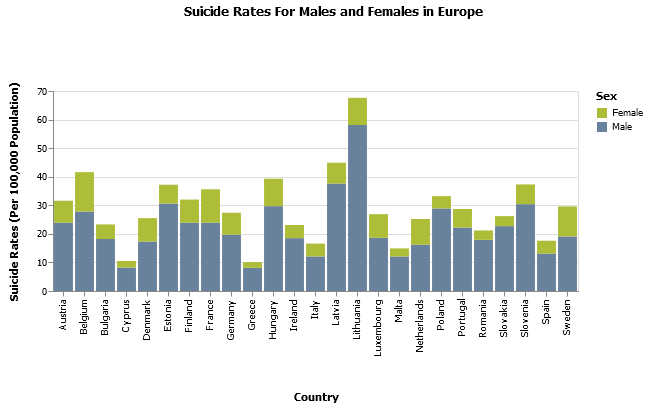

In [96]:
# Create a stacked bar plot of the suicide rates of males and females for countries in Europe.
df |>
@vlplot(:bar,
    title = "Suicide Rates For Males and Females in Europe",
    color={ :Sex,
      scale = {range = ["#AEBD38", "#68829E"]}
    },
    x={ :Country,
        title = "Country"
    },
    y={ :value,
        title = "Suicide Rates (Per 100,000 Population)"
    })

As we can see, on average, males make up a significantly higher proportion of the suicide rates per 100,000 population compared to females for the year 2016 for countries in the European Union. Lithuania has the highest total of deaths by suicide out of all the countries in the European Union whereas Cyprus and Greece have two of the lowest total suicide rates and suicide rates by gender in the European Union for the year 2016.